In [3]:
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
df = pd.read_csv('credit_card_svm.csv')

df.head()

,Income,Credit_Score,Debt,Zip_Code,Credit_Card_Eligibility
0,35795,417,41284,94131,0
1,20860,365,48050,85276,0
2,58158,474,31384,22559,0
3,31284,375,38252,75231,0
4,26265,413,37238,49044,0


In [5]:
print("Initial Class Distribution:")
print(df['Credit_Card_Eligibility'].value_counts())

Initial Class Distribution:
Credit_Card_Eligibility
1    3000
0    2000
Name: count, dtype: int64


In [6]:
df = df.drop(columns=['Zip_Code'])

In [7]:
ones = df[df['Credit_Card_Eligibility'] == 1].sample(n=2000, random_state=42)
zeroes = df[df['Credit_Card_Eligibility'] == 0]
df_balanced = pd.concat([ones, zeroes])

print("\nBalanced Class Distribution:")
print(df_balanced['Credit_Card_Eligibility'].value_counts())
df_balanced.head()


Balanced Class Distribution:
Credit_Card_Eligibility
1    2000
0    2000
Name: count, dtype: int64


,Income,Credit_Score,Debt,Credit_Card_Eligibility
3801,131717,651,15410,1
3190,130124,712,11148,1
3817,102335,806,4988,1
2251,107044,655,11001,1
4505,120149,758,10254,1


In [8]:
X = df.drop(columns=['Credit_Card_Eligibility'])
y = df['Credit_Card_Eligibility']

In [9]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Train SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)

SVC(C=1)

In [12]:
# Predictions
y_pred = svm_model.predict(X_test)

In [13]:
# Evaluate Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       406
           1       1.00      1.00      1.00       594

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



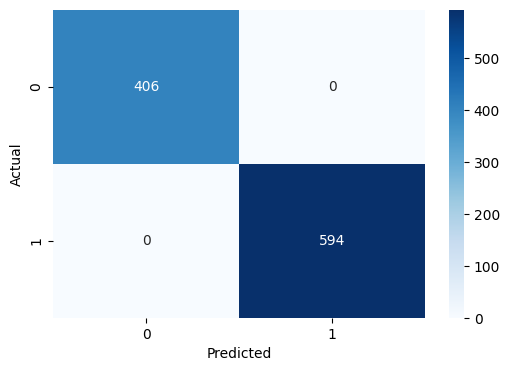

In [14]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [15]:
with open("model.pkl", "wb") as f:
    pickle.dump((svm_model, scaler), f)

print("Model saved successfully!")

Model saved successfully!
